# disjoint set / union-find
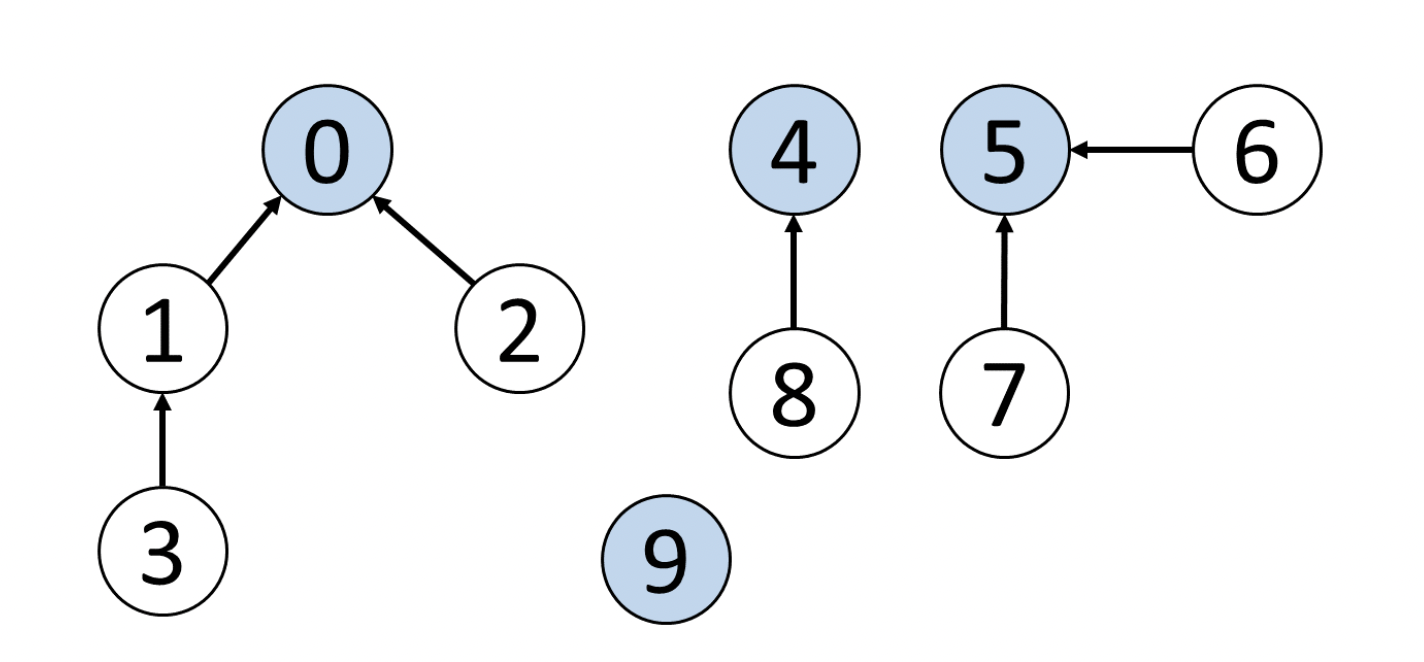

1. How to implement a “disjoint set”.

2. The find function of a disjoint set: finds the root node of a given vertex. For example, in Figure attached, the output of the find function for vertex 3 is 0.

3. The union function of a disjoint set: unions two vertices and makes their root nodes the same. In Figure attached, if we union vertex 4 and vertex 5, their root node will become the same, which means the union function will modify the root node of vertex 4 or vertex 5 to the same root node.

# DFS or BFS to traverse graph

> leetcode 797 ===> directional graph traverse

> leetcode 1971 ===> non-directional graph traverse

> leectcode 332 ===> real life question, construct order from directional edges



## Clone graph 
> leetcode 133

1. graph 1) a node could have any number of neighbors, 2) we do not want to get stuck in a cycle while traversing the graph, need to track the nodes which have been copied

2. need a hashmap to store the reference of the copy of all the nodes taht have already been visited and cloned. Key - original node, Value - Cloned node

3. copy needs two steps if do not find the node in the visited hash map: 1) create a copy clone_node = Node(node.val, []) 2) add to visited visited[node] = clone_node

4. make the recursive call for the nei of the node. the number of recursion calls would be equal to the number of its neighbors. Each recursion call will return the clone of a nei. We need prepare the list of these clones returned and put into neighbors of clone node. This way we will have cloned the given node and its neighbors. 

In [ ]:

# Definition for a Node.
class Node:
    def __init__(self, val = 0, neighbors = None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []


from typing import Optional
class Solution:
    def cloneGraph(self, node: Optional['Node']) -> Optional['Node']:
        # 1. graph 1) a node could have any number of neighbors, 2) we do not want to get stuck in a cycle while traversing the graph, need to track the nodes which have been copied
        # 2. need a hashmap to store the reference of the copy of all the nodes taht have already been visited and cloned. Key - original node, Value - Cloned node
        # 3. copy needs two steps if do not find the node in the visited hash map: 1) create a copy clone_node = Node(node.val, []) 2) add to visited visited[node] = clone_node
        # 4. make the recursive call for the nei of the node. the number of recursion calls would be equal to the number of its neighbors. Each recursion call will return the clone of a nei. We need prepare the list of these clones returned and put into neighbors of clone node. This way we will have cloned the given node and its neighbors. 

# DFS time O(V+E)
# space O(V) V is by visited space, stack is O(V) too
        visited = {}
        def dfs(node, visited):
            if not node: return None
            if node in visited: return visited[node]
            # clone the current node
            clone_node = Node(val=node.val, neighbors = [])
            visited[node] = clone_node
            # iterate through the oringinal node neighbors to generate neighbors' clone
            for nei in node.neighbors:
                clone_node.neighbors.append(dfs(nei,visited))
            return clone_node
        return dfs(node, visited)


        

In [ ]:
# BFS
# time O(V+E)
# space O(V)
# Definition for a Node.
class Node:
    def __init__(self, val = 0, neighbors = None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []


from typing import Optional
from collections import deque
class Solution:
    def cloneGraph(self, node: Optional['Node']) -> Optional['Node']:
        if not node: return None
        q = deque([node])
        clone_node = Node(val=node.val, neighbors = [])
        visited = {}
        visited[node]=clone_node
        while q:
            cur = q.popleft()
            for nei in cur.neighbors:
                if nei not in visited:
                    nei_clone = Node(val=nei.val, neighbors = [])
                    visited[nei] = nei_clone
                    q.append(nei)
                visited[cur].neighbors.append(visited[nei]) # this must be visited[nei], not nei_clone, which only clones the empty neighbor
        return visited[node]


